<a href="https://colab.research.google.com/github/Abdelrhman2022/Car_price_prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Car Price Prediction/car_data.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
data.shape

(4340, 8)

In [6]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [22]:
data.duplicated().sum()

2849

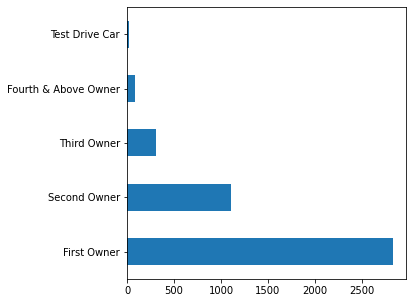

In [8]:
ax = data.owner.value_counts().plot(kind='barh', figsize=(5, 5));

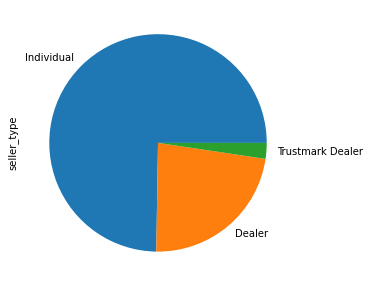

In [9]:
data.seller_type.value_counts().plot(kind='pie', figsize=(5, 5));

Text(0.5, 1.0, 'selling price')

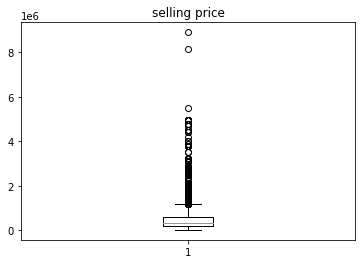

In [52]:
plt.boxplot(data['selling_price'])
plt.title("selling price")

In [ ]:
Q1 = np.percentile(data['selling_price'],25,interpolation = 'midpoint') 
Q2 = np.percentile(data['selling_price'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['selling_price'],75,interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

outlier = []
for x in data['selling_price']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

In [59]:
ind1 = data["selling_price"]>up_lim
upper = data.loc[ind1].index

In [60]:
ind1 = data["selling_price"]<low_lim
lower = data.loc[ind1].index

In [61]:
for _ in upper:
  data.drop( _, inplace = True)

Text(0.5, 1.0, 'selling price')

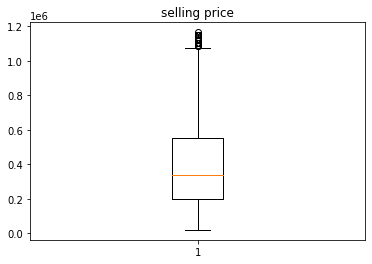

In [62]:
plt.boxplot(data['selling_price'])
plt.title("selling price")

In [63]:
data.shape

(4069, 8)

# Encode Dataset

In [69]:
X = data[data.columns.difference(['selling_price','owner', 'seller_type', 'name'])]
y = data['selling_price']

In [70]:
from sklearn.preprocessing import LabelEncoder
leFuel = LabelEncoder()
X.fuel = leFuel.fit_transform(X.fuel).astype(int)
leTransmission = LabelEncoder()
X.transmission = leTransmission.fit_transform(X.transmission).astype(int)

# Split Dataset To Training set and Testing set

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training Model

In [72]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [73]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

52.86819534999307 %


# Hperparameter Tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search CV

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [81]:
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

print(random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [82]:
regr = RandomForestRegressor()
regr =RandomizedSearchCV(estimator = regr, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
regr.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=100; total time=   0.2s
[CV] END m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [84]:
regr.best_score_

nan

In [86]:
print(new_data)
regressor.predict([new_data])

[2017, 7000, 4, 1]


array([50352.49666667])

# Test new record

In [85]:
new_data=[2017,7000,"Petrol","Manual"]
new_data[2]=leFuel.transform([new_data[2]])[0]
new_data[3]=leTransmission.transform([new_data[3]])[0]

## Saving the Model and Encoder using Pickle

In [88]:
import pickle
pickle.dump(regressor,open('regressor.pkl','wb'))
pickle.dump(leFuel,open('leFuel','wb'))
pickle.dump(leTransmission,open('leTransmission','wb'))